In [4]:
%matplotlib widget
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy

In [5]:
def function(x,y):
    #inversed drop-wave
    return -(-12*x*np.sin(12*np.sqrt(x**2+y**2))*(0.5*(x**2+y**2)+2)-x*(1+np.cos(12*np.sqrt(x**2+y**2)))*np.sqrt(x**2+y**2))/(((0.5*(x**2+y**2)+2)**2)*np.sqrt(x**2+y**2))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
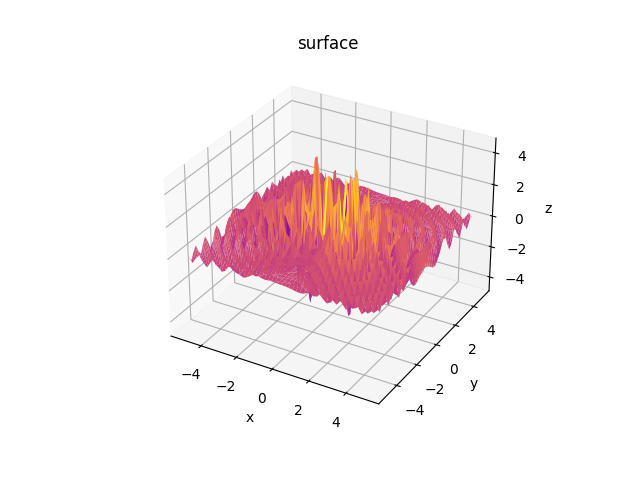

In [6]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)
Z = function(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(20, -90)
plt.show()

In [7]:
class indiv:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.fitness = 0
        
    def values(self):
        return (self.x, self.y)

In [14]:
class GA:
    def __init__(self, gens, pop_size):
        self.gens = gens
        self.pop_size = pop_size
        self.sols = list()
        self.population = list()
        
    def calculate(self,x,y):
         return function(x,y)  

    def create_population(self):
        for i in range(self.pop_size):
            
            #to initialize near the one corner
            initial_pos = []
            for i in range(2):
                if random.uniform(0,1) < 0.5:
                    initial_pos.append(random.uniform(-5, -4.5))
                else:
                    initial_pos.append(random.uniform(4.5, 5))
            
            a = indiv(initial_pos[0] , initial_pos[1])
            a.fitness = self.calculate(a.x, a.y)
            self.population.append(a)
            
        # sorted because we are sorting the elements in an increasing maner by fitness value
        # key=lambda x: x.fitness -> the sorting is done using the fitness value of each element of the list
        self.population = sorted(self.population, key=lambda x: x.fitness)

        
    def roulette(self, population):

        # Computes the totallity of the population's fitness

        max_ = sum([indiv.fitness if indiv.fitness >=0 else 1/abs(indiv.fitness) for indiv in population])

        indiv_probabilities = [indiv.fitness/max_ if indiv.fitness >=0 else (1/abs(indiv.fitness))/max_ for indiv in population]

        return population[np.random.choice(len(population), p=indiv_probabilities)]
    
    
    def geo_mutation(self, p):
        #TODO Make mutation, probability of being chosen and probability of being mutate per variable
        if random.random() <= 1/self.pop_size:
            
            ms = random.uniform(0,2)
            
            p.x = p.x + np.random.uniform(-ms, ms)
            p.y = p.y + np.random.uniform(-ms, ms)
            
            p.fitness = self.calculate(p.x, p.y)
            
        return p
    
    def geo_crossover(self, p1, p2):
        
        if random.random() <= 0.7:
            
            child1 = indiv(0,0)
            child2 = indiv(0,0)
            
            a = np.random.uniform(0,1)
            b = np.random.uniform(0,1)
            c = np.random.uniform(0,1)
            d = np.random.uniform(0,1)

            child1.x= a*p1.x + (1-a)*p2.x
            child1.y= b*p1.y + (1-b)*p2.y
            child2.x= c*p1.x + (1-c)*p2.x
            child2.y= d*p1.y + (1-d)*p2.y
            
            child1.fitness = self.calculate(child1.x, child1.y)
            child2.fitness = self.calculate(child2.x, child2.y)
            
        else:
            
            child1 = p1
            child2 = p2
            
        return child1, child2
    
     #function to save best indiv 
    def save_best_indiv(self):
        
        best_indiv = indiv(self.population[-1].x, self.population[-1].y)
        best_indiv.fitness = self.population[-1].fitness
        
        return best_indiv

    
        #switch the worst indiv of the new populaton with the best of the old population
    def return_best_indiv(self, new_pop, best_indiv):
        new_pop[0].x = best_indiv.x
        new_pop[0].y = best_indiv.y
        new_pop[0].fitness = best_indiv.fitness
  

    def apply_operators(self, parents):
        
        #save the best indiv - elitism
        best_indiv = self.save_best_indiv()
        
        new_pop = []
        while len(new_pop) < self.pop_size:
            p1 = random.choice(parents)
            parents.remove(p1)
            p2 = random.choice(parents)
            parents.remove(p2)

            p1, p2 = self.geo_crossover(p1,p2)
            p1 = self.geo_mutation(p1)
            p2 = self.geo_mutation(p2)
            
            if p1.x > 5 or p1.x < -5 or p1.y > 5 or p1.y < -5:
                if p1.x > 5:
                    p1.x = 5
                if p1.x < -5:
                    p1.x = -5
                if p1.y > 5:
                    p1.y = 5
                if p1.y < -5:
                    p1.y = -5
                p1.fitness = self.calculate(p1.x, p1.y)
            
            if p2.x > 5 or p2.x < -5 or p2.y > 5 or p2.y < -5:
                if p2.x > 5:
                    p2.x = 5
                if p2.x < -5:
                    p2.x = -5
                if p2.y > 5:
                    p2.y = 5
                if p2.y < -5:
                    p2.y = -5
                p2.fitness = self.calculate(p2.x, p2.y)

            new_pop.append(p1)
            new_pop.append(p2)  
            
        self.return_best_indiv(new_pop, best_indiv)
        self.population = sorted(new_pop, key=lambda x: x.fitness)
    
    
    def fit(self):
        for i in range(self.gens):
            if i == 0:
                self.create_population()
                print('Best individual at start: ', self.population[-1].values(), ' | fitness: ', self.population[-1].fitness)
            parents = list()
            while len(parents) <= self.pop_size:
                parents.append(self.roulette(self.population))
            self.apply_operators(parents)
            self.sols.append(self.population[-1])
            self.sols = sorted(self.sols, key=lambda x: x.fitness)
            #print('Generation ', i+1, ' ', self.sols[-1].values(), ' | fitness: ', self.sols[-1].fitness)
        print('FINAL SOLUTION', self.sols[-1].values(), ' | fitness: ', self.sols[-1].fitness) 

In [15]:
ga = GA(100,500)

In [16]:
ga.fit()

Best individual at start:  (4.543271639490868, -4.505098413335831)  | fitness:  0.38309131081933234
FINAL SOLUTION (1.030699786168198, 0.6131402345462464)  | fitness:  3.775210182935467
